In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
! pip install nltk==3.5.0

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 53.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for nltk: filename=nltk-3.5-py3-none-any.whl size=1434677 sha256=ae427e83e3e38951709e08321e4fe2eb75366b7c10093c45d2076e29d64f1253
  Stored in directory: /root/.cache/pip/wheels/81/c8/97/7683065c88936de3102093c42eed9defe41435ac4cbdedccf5
Successfully built nltk
  Attempting uninstall: nltk
    Found existing installation: nltk 3.9.1
    Uninstalling nltk-3.9.1:
      Successfully uninstalled nltk-3.9.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
textblob 0.19.0 requires nltk>=3.9, but you have nltk 3.5 which is incompatible.


In [4]:
import nltk as nltk
nltk.download('wordnet')

from nltk.corpus import wordnet as wn

[nltk_data] Downloading package wordnet to /root/nltk_data...


In [5]:
word = 'nile'
word = word.lower()
syns = wn.synsets(word)

for syn in syns:
  print(syn, ": ",syn.definition(),"\n")


Synset('nile.n.01') :  the world's longest river (4150 miles); flows northward through eastern Africa into the Mediterranean; the Nile River valley in Egypt was the site of the world's first great civilization 



In [6]:
word = 'bat'
word = word.lower()
syns = wn.synsets(word)

for syn in syns:
  print(syn, ": ",syn.definition(),"\n")


Synset('bat.n.01') :  nocturnal mouselike mammal with forelimbs modified to form membranous wings and anatomical adaptations for echolocation by which they navigate 

Synset('bat.n.02') :  (baseball) a turn trying to get a hit 

Synset('squash_racket.n.01') :  a small racket with a long handle used for playing squash 

Synset('cricket_bat.n.01') :  the club used in playing cricket 

Synset('bat.n.05') :  a club used for hitting a ball in various games 

Synset('bat.v.01') :  strike with, or as if with a baseball bat 

Synset('bat.v.02') :  wink briefly 

Synset('bat.v.03') :  have a turn at bat 

Synset('bat.v.04') :  use a bat 

Synset('cream.v.02') :  beat thoroughly and conclusively in a competition or fight 



In [7]:
# word = "lion"
# word = word.lower()
# syns = wn.synsets(word)

# hypernym = syns[0].hypernyms()
# print(hypernym)
# print(hypernym[0].hyponyms())

[Synset('big_cat.n.01')]
[Synset('cheetah.n.01'), Synset('jaguar.n.01'), Synset('leopard.n.02'), Synset('liger.n.01'), Synset('lion.n.01'), Synset('saber-toothed_tiger.n.01'), Synset('snow_leopard.n.01'), Synset('tiger.n.02'), Synset('tiglon.n.01')]


In [8]:
def get_distractors(syn,word):
  distractors =[]
  word = word.lower()
  og_word = word
  if len(word.split())>0 :
    word = word.replace(" ","_")
  hypernym = syn.hypernyms()
  if len(hypernym) == 0:
    return distractors
  for item in hypernym[0].hyponyms():
    name = item.lemmas()[0].name()
    if name == og_word:
      continue
    name = name.replace("_"," ")
    name = " ".join(w.capitalize() for w in name.split())
    if name is not None and name not in distractors:
      distractors.append(name)
  return distractors

original_word = "lion"
synset_to_use = wn.synsets(original_word,'n')[0]
distractors_calc = get_distractors(synset_to_use,original_word)

print("original word: ",original_word.capitalize())
print(distractors_calc)



original word:  Lion
['Cheetah', 'Jaguar', 'Leopard', 'Liger', 'Saber-toothed Tiger', 'Snow Leopard', 'Tiger', 'Tiglon']


In [9]:
original_word = "cricket"
synset_to_use = wn.synsets(original_word,'n')[1]
distractors_calc = get_distractors(synset_to_use,original_word)
print("original word: ",original_word.capitalize())
print(distractors_calc)

original word:  Cricket
['Ball Game', 'Field Hockey', 'Football', 'Hurling', 'Lacrosse', 'Polo', 'Pushball', 'Ultimate Frisbee']


In [10]:
!pip install --quiet flashtext==2.7
!pip install git+https://github.com/boudinfl/pke.git

  Preparing metadata (setup.py) ... done
  Cloning https://github.com/boudinfl/pke.git to /tmp/pip-req-build-ob5dwxfq
  Running command git clone --filter=blob:none --quiet https://github.com/boudinfl/pke.git /tmp/pip-req-build-ob5dwxfq
  Resolved https://github.com/boudinfl/pke.git to commit 69871ffdb720b83df23684fea53ec8776fd87e63
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 235.8/235.8 kB 15.1 MB/s eta 0:00:00
  Created wheel for pke: filename=pke-2.0.0-py3-none-any.whl size=6160628 sha256=15fbebe1661f6160b3ca1fccd51b10308bcc5775f0bf66cd219f3dd378f049e8
  Stored in directory: /tmp/pip-ephem-wheel-cache-yp2kfggs/wheels/2e/78/39/76193c2a815f4cf34d67af2d338910453ecae3bde545185b65
Successfully built pke


In [11]:
!pip install --quiet transformers
!pip install --quiet sentencepiece
!pip install --quiet textwrap3
!pip install --quiet gradio

In [12]:
!pip install --quiet strsim==0.0.3
!pip install --quiet sense2vec==2.0.0

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.4/42.4 kB 2.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.3/54.3 kB 3.7 MB/s eta 0:00:00


In [13]:
!pip install --quiet ipython-autotime
%load_ext autotime

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 60.7 MB/s eta 0:00:00
time: 299 µs (started: 2025-09-10 17:39:20 +00:00)


In [14]:
!pip install --quiet sentence-transformers==2.2.2

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.0/86.0 kB 5.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
time: 13.7 s (started: 2025-09-10 17:39:20 +00:00)


In [15]:
from textwrap3 import wrap

text = """Elon Musk has shown again he can influence the digital currency market with just his tweets. After saying that his electric vehicle-making company
Tesla will not accept payments in Bitcoin because of environmental concerns, he tweeted that he was working with developers of Dogecoin to improve
system transaction efficiency. Following the two distinct statements from him, the world's largest cryptocurrency hit a two-month low, while Dogecoin
rallied by about 20 percent. The SpaceX CEO has in recent months often tweeted in support of Dogecoin, but rarely for Bitcoin.  In a recent tweet,
Musk put out a statement from Tesla that it was “concerned” about the rapidly increasing use of fossil fuels for Bitcoin (price in India) mining and
transaction, and hence was suspending vehicle purchases using the cryptocurrency.  A day later he again tweeted saying, “To be clear, I strongly
believe in crypto, but it can't drive a massive increase in fossil fuel use, especially coal”.  It triggered a downward spiral for Bitcoin value but
the cryptocurrency has stabilised since.   A number of Twitter users welcomed Musk's statement. One of them said it's time people started realising
that Dogecoin “is here to stay” and another referred to Musk's previous assertion that crypto could become the world's future currency."""

for wrp in wrap(text, 150):
  print (wrp)
print ("\n")

Elon Musk has shown again he can influence the digital currency market with just his tweets. After saying that his electric vehicle-making company
Tesla will not accept payments in Bitcoin because of environmental concerns, he tweeted that he was working with developers of Dogecoin to improve
system transaction efficiency. Following the two distinct statements from him, the world's largest cryptocurrency hit a two-month low, while Dogecoin
rallied by about 20 percent. The SpaceX CEO has in recent months often tweeted in support of Dogecoin, but rarely for Bitcoin.  In a recent tweet,
Musk put out a statement from Tesla that it was “concerned” about the rapidly increasing use of fossil fuels for Bitcoin (price in India) mining and
transaction, and hence was suspending vehicle purchases using the cryptocurrency.  A day later he again tweeted saying, “To be clear, I strongly
believe in crypto, but it can't drive a massive increase in fossil fuel use, especially coal”.  It triggered a down

In [16]:
# text = """A Lion lay asleep in the forest, his great head resting on his paws. A timid little Mouse came upon him unexpectedly, and in her fright and haste to
# get away, ran across the Lion's nose. Roused from his nap, the Lion laid his huge paw angrily on the tiny creature to kill her.  "Spare me!" begged
# the poor Mouse. "Please let me go and some day I will surely repay you."  The Lion was much amused to think that a Mouse could ever help him. But he
# was generous and finally let the Mouse go.  Some days later, while stalking his prey in the forest, the Lion was caught in the toils of a hunter's
# net. Unable to free himself, he filled the forest with his angry roaring. The Mouse knew the voice and quickly found the Lion struggling in the net.
# Running to one of the great ropes that bound him, she gnawed it until it parted, and soon the Lion was free.  "You laughed when I said I would repay
# you," said the Mouse. "Now you see that even a Mouse can help a Lion." """
# for wrp in wrap(text, 150):
#   print (wrp)
# print ("\n")

time: 904 µs (started: 2025-09-10 17:39:33 +00:00)


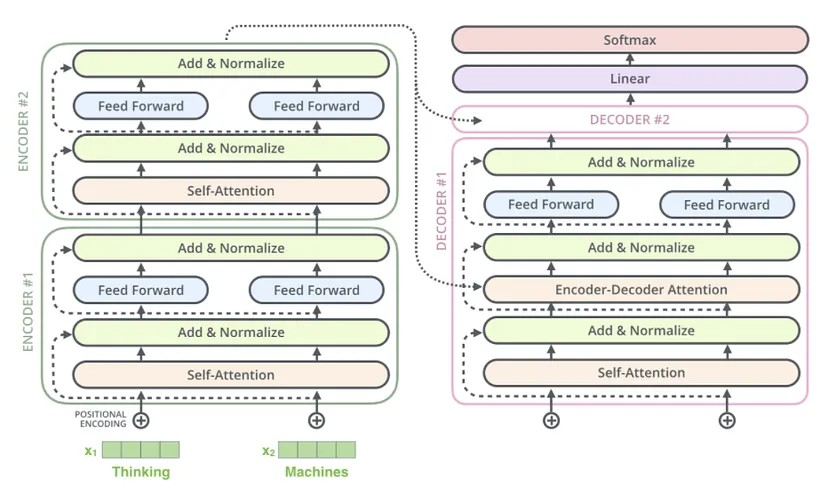

In [17]:
import torch
from transformers import T5ForConditionalGeneration,T5Tokenizer
summary_model = T5ForConditionalGeneration.from_pretrained('t5-base')
summary_tokenizer = T5Tokenizer.from_pretrained('t5-base')

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
summary_model = summary_model.to(device)

/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/1.21k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/892M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/147 [00:00<?, ?B/s]

spiece.model:   0%|          | 0.00/792k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.39M [00:00<?, ?B/s]

You are using the default legacy behaviour of the <class 'transformers.models.t5.tokenization_t5.T5Tokenizer'>. This is expected, and simply means that the `legacy` (previous) behavior will be used so nothing changes for you. If you want to use the new behaviour, set `legacy=False`. This should only be set if you understand what it means, and thoroughly read the reason why this was added as explained in https://github.com/huggingface/transformers/pull/24565


time: 53.4 s (started: 2025-09-10 17:39:33 +00:00)


In [18]:
import random
import numpy as np

def set_seed(seed: int):
    random.seed(seed)
    np.random.seed(seed)
    torch.manual_seed(seed)
    torch.cuda.manual_seed_all(seed)

set_seed(42)

time: 3.61 ms (started: 2025-09-10 17:40:27 +00:00)


In [19]:
import nltk
nltk.download('punkt')
nltk.download('brown')
nltk.download('wordnet')
from nltk.corpus import wordnet as wn
from nltk.tokenize import sent_tokenize

def postprocesstext (content):
  final=""
  for sent in sent_tokenize(content):
    sent = sent.capitalize()
    final = final +" "+sent
  return final


def summarizer(text,model,tokenizer):
  text = text.strip().replace("\n"," ")
  text = "summarize: "+text
  max_len = 512
  encoding = tokenizer.encode_plus(text,max_length=max_len, pad_to_max_length=False,
                                   truncation=True, return_tensors="pt").to(device)
  input_ids, attention_mask = encoding["input_ids"], encoding["attention_mask"]
  outs = model.generate(input_ids=input_ids,attention_mask=attention_mask, early_stopping=True, num_beams=3,
                        num_return_sequences=1, no_repeat_ngram_size=2,min_length = 75, max_length=180)
  dec = [tokenizer.decode(ids,skip_special_tokens=True) for ids in outs]
  summary = dec[0]
  summary = postprocesstext(summary)
  summary= summary.strip()

  return summary


summarized_text = summarizer(text,summary_model,summary_tokenizer)


print("\noriginal Text >>")
for wrp in wrap(text, 150):
  print(wrp)
print("\n")
print("Summarized Text >>")
for wrp in wrap(summarized_text, 150):
  print(wrp)
print("\n")

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package brown to /root/nltk_data...
[nltk_data]   Unzipping corpora/brown.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
Keyword arguments {'pad_to_max_length': False} not recognized.



original Text >>
Elon Musk has shown again he can influence the digital currency market with just his tweets. After saying that his electric vehicle-making company
Tesla will not accept payments in Bitcoin because of environmental concerns, he tweeted that he was working with developers of Dogecoin to improve
system transaction efficiency. Following the two distinct statements from him, the world's largest cryptocurrency hit a two-month low, while Dogecoin
rallied by about 20 percent. The SpaceX CEO has in recent months often tweeted in support of Dogecoin, but rarely for Bitcoin.  In a recent tweet,
Musk put out a statement from Tesla that it was “concerned” about the rapidly increasing use of fossil fuels for Bitcoin (price in India) mining and
transaction, and hence was suspending vehicle purchases using the cryptocurrency.  A day later he again tweeted saying, “To be clear, I strongly
believe in crypto, but it can't drive a massive increase in fossil fuel use, especially coal”.  I

In [20]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
import string
import pke #python keyphrase extraction
import traceback

def get_nouns_multipartite(content):
    out=[]
    try:
        extractor = pke.unsupervised.MultipartiteRank()
        extractor.load_document(input=content,
                                language='en')
        pos = {'PROPN','NOUN'}
        stoplist = list(string.punctuation)
        stoplist += ['-lrb-', '-rrb-', '-lcb-',
                     '-rcb-', '-lsb-', '-rsb-']
        stoplist += stopwords.words('english')
        extractor.candidate_selection(pos=pos)
        extractor.candidate_weighting(alpha=1.1,
                                      threshold=0.75,
                                      method='average')
        keyphrases = extractor.get_n_best(n=15)
        for val in keyphrases:
            out.append(val[0])
    except:
        out = []
        traceback.print_exc()
    return out

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


time: 13.6 s (started: 2025-09-10 17:40:35 +00:00)


In [21]:
from flashtext import KeywordProcessor


def get_keywords(originaltext,summarytext):
  keywords = get_nouns_multipartite(originaltext)
  print ("keywords unsummarized: ",keywords)
  keyword_processor = KeywordProcessor()
  for keyword in keywords:
    keyword_processor.add_keyword(keyword)

  keywords_found = keyword_processor.extract_keywords(summarytext)
  keywords_found = list(set(keywords_found))
  print ("keywords_found in summarized: ",keywords_found)

  important_keywords =[]
  for keyword in keywords:
    if keyword in keywords_found:
      important_keywords.append(keyword)

  return important_keywords[:4]


imp_keywords = get_keywords(text,summarized_text)
print (imp_keywords)


keywords unsummarized:  ['elon musk', 'dogecoin', 'bitcoin', 'statements', 'use', 'cryptocurrency', 'tesla', 'tweets', 'musk', 'system transaction efficiency', 'currency market', 'world', 'price', 'payments', 'company']
keywords_found in summarized:  ['bitcoin', 'cryptocurrency', 'system transaction efficiency', 'tesla', 'company', 'world', 'musk', 'payments', 'dogecoin']
['dogecoin', 'bitcoin', 'cryptocurrency', 'tesla']
time: 1.62 s (started: 2025-09-10 17:40:48 +00:00)


In [22]:
question_model = T5ForConditionalGeneration.from_pretrained('ramsrigouthamg/t5_squad_v1')
question_tokenizer = T5Tokenizer.from_pretrained('ramsrigouthamg/t5_squad_v1')
question_model = question_model.to(device)

config.json: 0.00B [00:00, ?B/s]

pytorch_model.bin:   0%|          | 0.00/892M [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/892M [00:00<?, ?B/s]

tokenizer_config.json: 0.00B [00:00, ?B/s]

spiece.model:   0%|          | 0.00/792k [00:00<?, ?B/s]

special_tokens_map.json: 0.00B [00:00, ?B/s]

time: 28.3 s (started: 2025-09-10 17:40:50 +00:00)


In [23]:
import spacy

# Load the English language model for spaCy
nlp = spacy.load("en_core_web_sm")

def get_question(context, answer, model, tokenizer):
    # Use spaCy to parse the context and answer
    doc_context = nlp(context)
    doc_answer = nlp(answer)

    # You can now use doc_context and doc_answer for syntax analysis
    # For example, you could look at the dependencies between tokens
    # This is a simplified example and you would need to implement
    # more sophisticated logic based on your specific needs.

    text = "context: {} answer: {}".format(context, answer)
    encoding = tokenizer.encode_plus(text, max_length=384,
                                     pad_to_max_length=False, truncation=True, return_tensors="pt").to(device)
    input_ids, attention_mask = encoding["input_ids"], encoding["attention_mask"]

    outs = model.generate(input_ids=input_ids,
                                  attention_mask=attention_mask,
                                  early_stopping=True,
                                  num_beams=5,
                                  num_return_sequences=1,
                                  no_repeat_ngram_size=2,
                                  max_length=72)

    dec = [tokenizer.decode(ids, skip_special_tokens=True) for ids in outs]

    Question = dec[0].replace("question:", "")
    Question = Question.strip()

    # You can add logic here to refine the generated question based on
    # the syntax parsing results. For example, you could check if the
    # generated question makes grammatical sense in relation to the answer.

    return Question

for wrp in wrap(summarized_text, 150):
    print(wrp)
print("\n")

for answer in imp_keywords:
    ques = get_question(summarized_text, answer, question_model, question_tokenizer)
    print(ques)
    print(answer.capitalize())
    print("\n")

Keyword arguments {'pad_to_max_length': False} not recognized.


Musk tweeted that his electric vehicle-making company tesla will not accept payments in bitcoin because of environmental concerns . He also said that
the company was working with developers of dogecoin to improve system transaction efficiency. The world's largest cryptocurrency hit a two-month low,
while doge coin rallied by about 20 percent. Musk has in recent months often tweeted in support of crypto, but rarely for bitcoin.




Keyword arguments {'pad_to_max_length': False} not recognized.


What did Musk say he was working with to improve system transaction efficiency?
Dogecoin




Keyword arguments {'pad_to_max_length': False} not recognized.


What cryptocurrency has Musk rarely tweeted in support of?
Bitcoin




Keyword arguments {'pad_to_max_length': False} not recognized.


What has Musk often tweeted in support of?
Cryptocurrency


What company did Musk say would not accept bitcoin payments?
Tesla


time: 3.71 s (started: 2025-09-10 17:41:18 +00:00)


In [24]:
!pip install --upgrade gradio

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.4/60.4 MB 14.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 325.0/325.0 kB 25.8 MB/s eta 0:00:00
  Attempting uninstall: gradio-client
    Found existing installation: gradio_client 1.12.1
    Uninstalling gradio_client-1.12.1:
      Successfully uninstalled gradio_client-1.12.1
  Attempting uninstall: gradio
    Found existing installation: gradio 5.44.1
    Uninstalling gradio-5.44.1:
      Successfully uninstalled gradio-5.44.1
time: 1min 7s (started: 2025-09-10 17:41:22 +00:00)


In [25]:
import gradio as gr

context_input = gr.Textbox(lines=10, placeholder="Enter paragraph/content here...")
output = gr.HTML(label='Question and Answer')


def generate_question(context_input):
  summary_text = summarizer(context_input,summary_model,summary_tokenizer)
  for wrp in wrap(summary_text, 150):
    print (wrp)
  np =  get_keywords(context_input,summary_text)
  print ("\n\nNoun phrases",np)
  output=""
  for answer in np:
    ques = get_question(summary_text,answer,question_model,question_tokenizer)

    output = output + "<b style='color:yellow;'>" + ques + "</b>"
    output = output + "<br>"

    output = output + "<b style='color:#00FF00;'>" + "Ans: " +answer.capitalize()+  "</b>"
    output = output + "<br>"

  summary ="Summary: "+ summary_text
  for answer in np:
    summary = summary.replace(answer,"<b>"+answer+"</b>")
    summary = summary.replace(answer.capitalize(),"<b>"+answer.capitalize()+"</b>")
  output = output + "<p>"+summary+"</p>"

  return output

iface = gr.Interface(
  fn=generate_question,
  inputs=context_input,
  outputs=output)
iface.launch(debug=False)

It looks like you are running Gradio on a hosted Jupyter notebook, which requires `share=True`. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://dd4118c02f40191aaf.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)


time: 7.71 s (started: 2025-09-10 17:42:29 +00:00)
